In [2]:
!file Downloads/reprobing.pinger-c2.it110c.001


Downloads/reprobing.pinger-c2.it110c.001: data


In [4]:
with open("Downloads/reprobing.pinger-c2.it110c.001", "rb") as f:
    data = f.read(64)  # Read first 64 bytes

print(data.hex())

06182a2a6d616769630a00a5514ff2600e0c5543e10e864206182a2a636865636b706f696e743a33322c302f302c302c0618302c300a00000000000000000000


In [6]:
with open("Downloads/reprobing.pinger-c2.it110c.001", "rb") as f:
    data = f.read()

text = ''.join([chr(b) if 32 <= b < 127 else '.' for b in data[:500]])
print(text)


..**magic...QO.`..UC...B..**checkpoint:32,0/0,0,..0,0.....................@(#) $Id: 540fd1536271..4e7b26bd91e401545eab8a..addfb7 $.............................................uguq....."_H5"_H5.......uguq....."$/)"$/).......6guq.....av..av.........3guq...3...)...)........8guq...8.@B$&@G.........4guq...?.C..rC..r.......3guq...8.b..,b..,.......6guq...A.A.1.A.1........3guq...B.C..qC..q.......6guq...V.C...C...........guq...Ni..;&..;&.......2guq...dj..$Z..$Z........guq.......T=..[.........guq...f.cS..


In [14]:
!pip3 install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0


In [7]:
import magic

mime = magic.Magic(mime=True)
file_type = mime.from_file("reprobing.pinger-c2.it110c.001")
print(f"Detected file type: {file_type}")

ModuleNotFoundError: No module named 'magic'

In [24]:
!pip3 install python-magic


In [23]:
import re

with open("Downloads/reprobing.pinger-c2.it110c.001", "rb") as f:
    data = f.read()

strings = re.findall(b"[ -~]{4,}", data)  # Extract readable ASCII strings
print(strings[:20])  # Print first 20 matches


[b'**magic', b'**checkpoint:32,0/0,0,', b'@(#) $Id: 540fd1536271', b'4e7b26bd91e401545eab8a', b'addfb7 $', b'uguq', b'"_H5"_H5', b'uguq', b'"$/)"$/)', b'6guq', b'3guq', b'8guq', b'@B$&@G', b'4guq', b'3guq', b'6guq', b'3guq', b'6guq', b'2guq', b'2guq']


In [28]:
import magic

mime = magic.Magic(mime=True)
file_type = mime.from_file("Downloads/reprobing.pinger-c2.it110c.001")
print(f"Detected file type: {file_type}")


Detected file type: application/octet-stream


In [30]:
import re

with open("Downloads/reprobing.pinger-c2.it110c.001", "rb") as f:
    data = f.read()

strings = re.findall(b"[ -~]{4,}", data)  # Extract readable ASCII strings
print(strings[:20])  # Show the first 20 strings


[b'**magic', b'**checkpoint:32,0/0,0,', b'@(#) $Id: 540fd1536271', b'4e7b26bd91e401545eab8a', b'addfb7 $', b'uguq', b'"_H5"_H5', b'uguq', b'"$/)"$/)', b'6guq', b'3guq', b'8guq', b'@B$&@G', b'4guq', b'3guq', b'6guq', b'3guq', b'6guq', b'2guq', b'2guq']


In [32]:
import pandas as pd

try:
    df = pd.read_csv("Downloads/reprobing.pinger-c2.it110c.001", sep="\t", header=None, error_bad_lines=False)
    display(df.head())  # Show the first few rows
except Exception as e:
    print(f"Not a CSV-like file: {e}")


Not a CSV-like file: read_csv() got an unexpected keyword argument 'error_bad_lines'


In [34]:
import pickle

try:
    with open("Downloads/reprobing.pinger-c2.it110c.001", "rb") as f:
        data = pickle.load(f)
    print(data)
except Exception as e:
    print(f"Not a pickle file: {e}")


Not a pickle file: invalid load key, '\x06'.


In [ ]:
import struct
import pandas as pd

data = []

with open("Downloads/reprobing.pinger-c2.it110c.001", "rb") as f:
    while True:
        record = f.read(16)  # Assuming each entry is 16 bytes
        if not record:
            break
        
        try:
            timestamp, ip1, ip2, ip3, ip4, response_type, rtt = struct.unpack("!I4BHI", record)
            ip_address = f"{ip1}.{ip2}.{ip3}.{ip4}"
            data.append([timestamp, ip_address, response_type, rtt])
        except:
            break

df = pd.DataFrame(data, columns=["Timestamp", "IP Address", "Response Type", "RTT"])
df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit="s")

print(df.head())  # Preview the dataset


### Step 1: Load IPs from Excel


In [41]:
import pandas as pd

# Load IPs from Excel file
file_path = "downloads/all_ips.xlsx"
ip_list = pd.read_excel(file_path)

# Ensure the column containing IPs is named correctly
ip_list.rename(columns={ip_list.columns[0]: "IP Address"}, inplace=True)

print(ip_list.head())  # Check sample IPs


      IP Address
0    100.10.2/24
1   100.11.63/24
2   100.12.22/24
3  100.14.131/24
4  100.14.233/24


### Step 2: Probe IPs Using ICMP Pings


In [42]:
from scapy.all import sr1, IP, ICMP
import datetime

def ping_ip(ip):
    """Send an ICMP ping and return response time (RTT in ms)."""
    try:
        packet = IP(dst=ip)/ICMP()
        response = sr1(packet, timeout=2, verbose=False)
        
        if response:
            return "alive", response.time  # RTT in seconds
        else:
            return "unreachable", None  # No response
    except Exception as e:
        return "error", None  # If an error occurs


In [43]:
sample_ip = ip_list["IP Address"].iloc[0]
status, rtt = ping_ip(sample_ip)
print(f"IP: {sample_ip}, Status: {status}, RTT: {rtt}")


IP: 100.10.2/24, Status: error, RTT: None


In [45]:
import pandas as pd

# Load IP list
file_path = "downloads/all_ips.xlsx"
ip_list = pd.read_excel(file_path)

# Ensure correct column name
ip_list.rename(columns={ip_list.columns[0]: "IP Address"}, inplace=True)

# Check if any IP contains a slash ('/')
cidr_ips = ip_list[ip_list["IP Address"].str.contains("/", na=False)]
print(cidr_ips)  # Print CIDR-based IPs


          IP Address
0        100.10.2/24
1       100.11.63/24
2       100.12.22/24
3      100.14.131/24
4      100.14.233/24
...              ...
40485   99.92.177/24
40486    99.92.36/24
40487    99.95.43/24
40488   99.96.228/24
40489   99.97.131/24

[40490 rows x 1 columns]


In [48]:
import pandas as pd
import ipaddress

def fix_cidr_format(ip):
    """Ensure CIDR notation has four octets (e.g., fix '100.10.2/24' to '100.10.2.0/24')."""
    if "/" in ip:  # Only fix CIDR notation
        parts = ip.split("/")
        ip_part = parts[0].split(".")
        while len(ip_part) < 4:  # Ensure 4 octets
            ip_part.append("0")
        return ".".join(ip_part) + "/" + parts[1]  # Reconstruct valid CIDR
    return ip  # Return as-is for normal IPs

def expand_cidr(ip):
    """Convert CIDR to a list of individual IPs, or return a single IP as-is."""
    try:
        ip = fix_cidr_format(ip)  # Ensure valid CIDR notation
        network = ipaddress.ip_network(ip, strict=False)
        return [str(host) for host in network.hosts()]  # Exclude network & broadcast
    except ValueError:
        return [ip]  # Return single IP unchanged

# Load IP list from Excel
file_path = "downloads/all_ips.xlsx"
ip_list = pd.read_excel(file_path)

# Ensure correct column name
ip_list.rename(columns={ip_list.columns[0]: "IP Address"}, inplace=True)

# Expand all CIDR notations in the dataset
expanded_ips = []
for ip in ip_list["IP Address"]:
    expanded_ips.extend(expand_cidr(str(ip)))  # Ensure proper string handling

# Convert expanded list to a DataFrame
expanded_ip_df = pd.DataFrame(expanded_ips, columns=["IP Address"])

# Save expanded IPs (Optional)
expanded_ip_df.to_csv("expanded_ips_fixed.csv", index=False)

print(expanded_ip_df.head(20))  # Check expanded IPs
print(f"Total expanded IPs: {len(expanded_ip_df)}")


     IP Address
0    100.10.2.1
1    100.10.2.2
2    100.10.2.3
3    100.10.2.4
4    100.10.2.5
5    100.10.2.6
6    100.10.2.7
7    100.10.2.8
8    100.10.2.9
9   100.10.2.10
10  100.10.2.11
11  100.10.2.12
12  100.10.2.13
13  100.10.2.14
14  100.10.2.15
15  100.10.2.16
16  100.10.2.17
17  100.10.2.18
18  100.10.2.19
19  100.10.2.20
Total expanded IPs: 10381996


### Step 3: Probe All IPs Periodically (Every 11 Minutes)


In [44]:
import time

def probe_all_ips(ip_list):
    """Probes all IPs and logs results every 11 minutes."""
    results = []

    for ip in ip_list["IP Address"]:
        status, rtt = ping_ip(ip)
        timestamp = datetime.datetime.utcnow()

        results.append([timestamp, ip, status, rtt])

    return results

# Run this every 11 minutes
while True:
    probe_data = probe_all_ips(ip_list)
    
    # Save results to CSV
    df = pd.DataFrame(probe_data, columns=["Timestamp", "IP Address", "Status", "RTT"])
    df.to_csv("Downloads/probed_data.csv", mode='a', index=False, header=False)

    print("Probing round complete. Sleeping for 11 minutes...")
    time.sleep(660)  # Sleep for 11 minutes


/var/folders/t6/qlb6wcs55qq054nwct9y_rfr0000gp/T/ipykernel_9466/616772738.py:9: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  timestamp = datetime.datetime.utcnow()


Probing round complete. Sleeping for 11 minutes...


KeyboardInterrupt: 

In [ ]:
Step 4: Compute Volatility (State Changes Over Time)


In [50]:
  pip install cryptography


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 68.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
%cd Downloads


/Users/satishk/Downloads


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [54]:
import bz2

input_file = "reprobing.pinger-c2.it110c.001.bz2"  # Update the file path if necessary
output_file = "reprobing.pinger-c2.it110c.001"  # Decompressed output file

# Decompress .bz2 file
with bz2.BZ2File(input_file, "rb") as fr, open(output_file, "wb") as fw:
    fw.write(fr.read())

print(f"Decompression completed: {output_file}")


Decompression completed: reprobing.pinger-c2.it110c.001


In [56]:
import hashlib

file_path = "reprobing.pinger-c2.it110c.001.bz2"  # Update with your actual file name

sha1 = hashlib.sha1()
with open(file_path, "rb") as f:
    while chunk := f.read(8192):  # Read in chunks
        sha1.update(chunk)

computed_hash = sha1.hexdigest()
print("Computed SHA-1:", computed_hash)


Computed SHA-1: cb1fc1d179fe5be01d1704450fa0e3491fada81c


In [58]:
pip install structlog

Note: you may need to restart the kernel to use updated packages.


In [2]:
import struct

# Define the DATAv3 record format
DATA_V3_FORMAT = ">BBBxBHHIIfII"  # Big-endian format based on dataset description
DATA_V3_SIZE = struct.calcsize(DATA_V3_FORMAT)

def parse_data_v3_record(record):
    """Parse a single DATAv3 record from binary format."""
    fields = struct.unpack(DATA_V3_FORMAT, record)

    parsed_record = {
        "Type": fields[0],  # Always 5 for DATAv3
        "Length": fields[1],  # Always 24 for DATAv3
        "ICMP Reply Type": fields[2],
        "ICMP Reply Code": fields[3],
        "Reserved": fields[4],
        "Flags": fields[5],
        "TTL": fields[6],
        "Timestamp": fields[7],  # Unix timestamp
        "RTT (microseconds)": fields[8],
        "Probe IP": fields[9],  # Convert to IPv4 later
        "Response IP": fields[10]  # Convert to IPv4 later
    }

    return parsed_record

def int_to_ip(ip_int):
    """Convert a 32-bit integer to an IPv4 address."""
    return ".".join(map(str, [(ip_int >> (8 * i)) & 0xFF for i in range(4)][::-1]))

def read_binary_dataset(file_path):
    """Read the binary dataset and extract meaningful information."""
    records = []

    with open(file_path, "rb") as f:
        while True:
            record = f.read(DATA_V3_SIZE)
            if len(record) < DATA_V3_SIZE:
                break  # Stop when no more complete records are found

            parsed_record = parse_data_v3_record(record)
            parsed_record["Probe IP"] = int_to_ip(parsed_record["Probe IP"])
            parsed_record["Response IP"] = int_to_ip(parsed_record["Response IP"])
            records.append(parsed_record)

    return records

# File path to the dataset
file_path = "reprobing.pinger-c2.it110c.001"

# Read and process the dataset
records = read_binary_dataset(file_path)

# Print the first 5 records as an example
for i, rec in enumerate(records[:5]):
    print(f"Record {i+1}: {rec}")


Record 1: {'Type': 6, 'Length': 24, 'ICMP Reply Type': 42, 'ICMP Reply Code': 109, 'Reserved': 24935, 'Flags': 26979, 'TTL': 167814481, 'Timestamp': 1341284366, 'RTT (microseconds)': 1.6429349691513488e-31, 'Probe IP': '14.134.66.6', 'Response IP': '24.42.42.99'}
Record 2: {'Type': 104, 'Length': 101, 'ICMP Reply Type': 99, 'ICMP Reply Code': 112, 'Reserved': 28521, 'Flags': 28276, 'TTL': 976433708, 'Timestamp': 808398892, 'RTT (microseconds)': 6.258189522156954e-10, 'Probe IP': '48.44.48.10', 'Response IP': '0.0.0.0'}
Record 3: {'Type': 0, 'Length': 0, 'ICMP Reply Type': 0, 'ICMP Reply Code': 0, 'Reserved': 0, 'Flags': 0, 'TTL': 0, 'Timestamp': 399424, 'RTT (microseconds)': 9.057235213563719e-15, 'Probe IP': '36.73.100.58', 'Response IP': '32.53.52.48'}
Record 4: {'Type': 102, 'Length': 100, 'ICMP Reply Type': 49, 'ICMP Reply Code': 51, 'Reserved': 13874, 'Flags': 14129, 'TTL': 102249573, 'Timestamp': 929182262, 'RTT (microseconds)': 1.0524946809849496e+21, 'Probe IP': '101.52.48.49',

In [4]:
import struct

# FSDB Header Format
FSDB_HEADER = "#fsdb -F t reply_type\ttime_s\trtt_us\tttl\tprobe_addr\treply_addr\n"

# Corrected binary format based on the dataset documentation
DATA_V3_FORMAT = ">BBBxBHIIfII"  # Adjusted for alignment
DATA_V3_SIZE = struct.calcsize(DATA_V3_FORMAT)

def parse_data_v3_record(record):
    """Parse a single DATAv3 record from binary format."""
    fields = struct.unpack(DATA_V3_FORMAT, record)

    reply_type = f"0x{fields[2]:02x}{fields[3]:02x}"  # ICMP Reply Type in hex format
    time_s = fields[7]  # Unix timestamp
    rtt_us = int(fields[8] * 1e6)  # Convert RTT to microseconds
    ttl = fields[6]  # TTL
    probe_addr = int_to_ip(fields[9])  # Convert to IPv4
    reply_addr = int_to_ip(fields[10])  # Convert to IPv4

    return f"{reply_type}\t{time_s}\t{rtt_us}\t{ttl}\t{probe_addr}\t{reply_addr}"

def int_to_ip(ip_int):
    """Convert a 32-bit integer to an IPv4 address."""
    return ".".join(map(str, [(ip_int >> (8 * i)) & 0xFF for i in range(4)][::-1]))

def read_binary_dataset(file_path, output_file="parsed_output.txt"):
    """Read the binary dataset, extract meaningful information, and save to file."""
    with open(file_path, "rb") as f, open(output_file, "w") as out_f:
        out_f.write(FSDB_HEADER)  # Write header

        while True:
            record = f.read(DATA_V3_SIZE)
            if len(record) < DATA_V3_SIZE:
                break  # Stop when no more complete records are found

            parsed_record = parse_data_v3_record(record)
            out_f.write(parsed_record + "\n")  # Write record in FSDB format

    print(f"✅ Output saved to {output_file}")

# Path to dataset
file_path = "reprobing.pinger-c2.it110c.001"

# Read and process dataset
read_binary_dataset(file_path)


IndexError: tuple index out of range

In [1]:
print("hi")

hi


In [6]:
%cd print_datafile-0.52/

/Users/satishk/Downloads/print_datafile-0.52


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
import pandas as pd

# Define input and output file paths
input_file = "output.txt"  # Replace with actual path where your output is stored
csv_output_template = "output_part_{}.csv"

# Read the file and extract relevant rows (ignoring metadata lines starting with '#')
with open(input_file, "r") as f:
    lines = [line.strip() for line in f if not line.startswith("#")]

# Define column names
columns = ["reply_type", "time_s", "rtt_us", "ttl", "probe_addr", "reply_addr", "flags"]

# Chunk size (number of rows per CSV file)
chunk_size = 500000  # Adjust based on available memory

# Process data in chunks
chunk = []
file_count = 1

for i, line in enumerate(lines):
    chunk.append(line.split())

    # When chunk size is reached or it's the last row, save it
    if len(chunk) >= chunk_size or i == len(lines) - 1:
        df_chunk = pd.DataFrame(chunk, columns=columns)
        
        # Convert time_s to datetime
        df_chunk["time_s"] = pd.to_datetime(df_chunk["time_s"], unit="s")

        # Convert numeric columns
        for col in ["rtt_us", "ttl", "flags"]:
            df_chunk[col] = pd.to_numeric(df_chunk[col], errors="coerce")

        # Save chunk to CSV
        df_chunk.to_csv(csv_output_template.format(file_count), index=False)
        
        # Reset chunk for next batch
        chunk = []
        file_count += 1
        print("hi")

# Return the paths to the generated CSV files
csv_files = [csv_output_template.format(i) for i in range(1, file_count)]
csv_files


In [3]:
%cd Downloads


/Users/satishk/Downloads


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [6]:
import pandas as pd
import glob

# Define file pattern (adjust path if needed)
file_pattern = "output_part_*.csv"

# Chunk size (adjust based on available memory)
chunk_size = 10000

# Define column names based on input structure
columns = ['reply_type', 'time_s', 'rtt_us', 'ttl', 'probe_addr', 'reply_addr', 'flags']

# Set to store unique probe_addr values
unique_ips = set()

# Process each file matching the pattern
for file in glob.glob(file_pattern):
    print(f"Processing file: {file}")
    
    # Read the CSV in chunks, handling no header
    for chunk in pd.read_csv(file, delimiter="\t", names=columns, comment='#', chunksize=chunk_size):
        # Extract and add unique probe_addr values
        unique_ips.update(chunk['probe_addr'].dropna().unique())

# Convert set to sorted list
unique_ips_list = sorted(unique_ips)

# Display unique IPs
print(f"Total unique IPs found: {len(unique_ips_list)}")
print(unique_ips_list[:10])  # Display first 10 as a sample


Total unique IPs found: 0
[]


In [1]:
# Re-run the complete script since execution state was reset

import pandas as pd

input_file = "output_part_aa.csv"  # Update this path as needed

# Chunk size (to process large files efficiently)
chunk_size = 50000 

# Define column names
columns = ["reply_type", "time_s", "rtt_us", "ttl", "probe_addr", "reply_addr", "flags"]

# Initialize empty lists to store results
availability_list = []
volatility_list = []
median_up_list = []
rtt_stats_list = []

# Process file in chunks
for chunk in pd.read_csv(input_file, names=columns, chunksize=chunk_size, skiprows=1):
    # Convert timestamp to datetime for time-based calculations
    chunk["time_s"] = pd.to_datetime(chunk["time_s"], unit="s")

    # Convert numeric columns
    for col in ["rtt_us", "ttl", "flags"]:
        chunk[col] = pd.to_numeric(chunk[col], errors="coerce")

    # 1️⃣ Compute Availability (Fraction of Time Responsive)
    total_pings = chunk.groupby("probe_addr")["reply_type"].count()
    successful_pings = chunk[chunk["reply_type"] == "0x0000"].groupby("probe_addr")["reply_type"].count()
    availability = (successful_pings / total_pings).fillna(0).reset_index()
    availability.columns = ["probe_addr", "availability"]
    availability_list.append(availability)

    # 2️⃣ Compute Volatility (Rate of State Change)
    def compute_volatility(group):
        changes = (group["reply_type"] != group["reply_type"].shift()).sum()
        return changes / len(group)

    volatility = chunk.groupby("probe_addr").apply(compute_volatility).reset_index()
    volatility.columns = ["probe_addr", "volatility"]
    volatility_list.append(volatility)

    # 3️⃣ Compute Median Up-Time (Duration of Continuous "Up" Periods)
    chunk["up_state"] = chunk["reply_type"] == "0x0000"
    chunk["session_id"] = (chunk["up_state"] != chunk["up_state"].shift()).cumsum()
    up_sessions = chunk[chunk["up_state"]].groupby(["probe_addr", "session_id"])["time_s"].agg(["min", "max"])
    up_sessions["duration"] = (up_sessions["max"] - up_sessions["min"]).dt.total_seconds()
    median_up = up_sessions.groupby("probe_addr")["duration"].median().reset_index()
    median_up.columns = ["probe_addr", "median_up"]
    median_up_list.append(median_up)

    # 4️⃣ Compute RTT Statistics (Median & Standard Deviation)
    rtt_stats = chunk.groupby("probe_addr")["rtt_us"].agg(["median", "std"]).reset_index()
    rtt_stats.columns = ["probe_addr", "median_rtt", "std_rtt"]
    rtt_stats_list.append(rtt_stats)

# Combine all results
df_availability = pd.concat(availability_list, ignore_index=True).groupby("probe_addr")["availability"].mean().reset_index()
df_volatility = pd.concat(volatility_list, ignore_index=True).groupby("probe_addr")["volatility"].mean().reset_index()
df_median_up = pd.concat(median_up_list, ignore_index=True).groupby("probe_addr")["median_up"].median().reset_index()
df_rtt_stats = pd.concat(rtt_stats_list, ignore_index=True).groupby("probe_addr").agg({"median_rtt": "median", "std_rtt": "median"}).reset_index()

# Merge all features into one DataFrame
df_final = df_availability.merge(df_volatility, on="probe_addr", how="left")\
                          .merge(df_median_up, on="probe_addr", how="left")\
                          .merge(df_rtt_stats, on="probe_addr", how="left")

# Save to CSV
output_file = "/mnt/data/derived_features.csv"
df_final.to_csv(output_file, index=False)

# Provide download link
output_file


UsageError: Line magic function `%#` not found.


In [15]:
import pandas as pd
import glob

# Define input and output file patterns
input_files = glob.glob("output_part_*")  # Adjust if necessary
output_folder = "converted_csv/"  # Output directory for CSVs

# Define column names (assuming structure from your input)
columns = ['reply_type', 'time_s', 'rtt_us', 'ttl', 'probe_addr', 'reply_addr', 'flags']

# Ensure output folder exists
import os
os.makedirs(output_folder, exist_ok=True)

# Convert each file
for file in input_files:
    print(f"Processing: {file}")
    
    # Read the text file, assuming tab-separated values
    df = pd.read_csv(file, delimiter="\t", names=columns, comment='#', header=None)
    
    # Define output CSV path
    output_file = os.path.join(output_folder, f"{os.path.basename(file)}.csv")
    
    # Save to CSV
    df.to_csv(output_file, index=False)
    print(f"Saved: {output_file}")

print("✅ Conversion complete! All files saved as CSVs.")


Processing: output_part_ah
Saved: converted_csv/output_part_ah.csv
Processing: output_part_af
Saved: converted_csv/output_part_af.csv
Processing: output_part_aa
Saved: converted_csv/output_part_aa.csv
Processing: output_part_ag
Saved: converted_csv/output_part_ag.csv
Processing: output_part_ai
Saved: converted_csv/output_part_ai.csv
Processing: output_part_al
Saved: converted_csv/output_part_al.csv
Processing: output_part_ak
Saved: converted_csv/output_part_ak.csv
Processing: output_part_ab
Saved: converted_csv/output_part_ab.csv
Processing: output_part_ae
Saved: converted_csv/output_part_ae.csv
Processing: output_part_ad
Saved: converted_csv/output_part_ad.csv
Processing: output_part_ac
Saved: converted_csv/output_part_ac.csv
Processing: output_part_aj
Saved: converted_csv/output_part_aj.csv
Processing: output_part_am
Saved: converted_csv/output_part_am.csv
✅ Conversion complete! All files saved as CSVs.


In [19]:
%cd converted_csv


/Users/satishk/Downloads/print_datafile-0.52/converted_csv


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [29]:
%ls

converted_csv/      output_part_ad.csv  output_part_ah.csv  output_part_al.csv
output_part_aa.csv  output_part_ae.csv  output_part_ai.csv  output_part_am.csv
output_part_ab.csv  output_part_af.csv  output_part_aj.csv
output_part_ac.csv  output_part_ag.csv  output_part_ak.csv


In [32]:
import pandas as pd

# Define the file name
input_file = "output_part_aa.csv"

# Define column names based on assumed structure
columns = ['reply_type', 'time_s', 'rtt_us', 'ttl', 'probe_addr', 'reply_addr', 'flags']

# Read the first few lines of the file while ignoring comment lines
df = pd.read_csv(input_file, names=columns, comment='#', header=None, skiprows=1)
df.head()


,reply_type,time_s,rtt_us,ttl,probe_addr,reply_addr,flags
0,0x0000,1735750096,4630,117,34.36.47.41,34.36.47.41,0
1,0x0000,1735750096,6916,54,97.118.169.190,97.118.169.190,0
2,0x0000,1735750096,13068,51,24.128.41.177,24.128.41.177,0
3,0x0301,1735750096,14492,56,64.66.36.38,64.71.165.14,26
4,0x0000,1735750096,16151,52,67.190.143.114,67.190.143.114,0


In [35]:
unique_ips = df['probe_addr'].dropna().unique()

# Convert to sorted list
unique_ips_sorted = sorted(unique_ips)
print(unique_ips_sorted)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [23]:
import pandas as pd
import glob
import os
import re

# Define input and output file patterns
input_files = glob.glob("output_part_*")  # Adjust if needed
output_folder = "converted_csv/"  # Output directory for CSVs

# Define column names (assumed structure)
columns = ['reply_type', 'time_s', 'rtt_us', 'ttl', 'probe_addr', 'reply_addr', 'flags']

# Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

# Convert each file
for file in input_files:
    print(f"Processing: {file}")
    
    # Read file while handling inconsistent spacing/tabs
    with open(file, "r") as f:
        lines = f.readlines()

    # Filter out comment lines (`#`)
    data_lines = [line.strip() for line in lines if not line.startswith("#")]

    # Use regex to properly split on **whitespace/tabs**
    data = [re.split(r'\s+', line) for line in data_lines]

    # Convert to DataFrame
    df = pd.DataFrame(data, columns=columns)

    # Define output CSV path
    output_file = os.path.join(output_folder, f"{os.path.basename(file)}.csv")

    # Save to CSV (ensuring proper comma separation)
    df.to_csv(output_file, index=False)

    print(f"Saved: {output_file}")

print("✅ Conversion complete! All files are now properly formatted CSVs.")


Processing: output_part_ag.csv


KeyboardInterrupt: 

In [9]:
import pandas as pd
import glob

# Get all CSV files that match the naming pattern "output_part_*"
input_files = sorted(glob.glob("output_part_*.csv"))

# Define column names
columns = ["reply_type", "time_s", "rtt_us", "ttl", "probe_addr", "reply_addr", "flags"]

# Iterate through each file and process it separately
output_files = []

for input_file in input_files:
    print(f"Processing {input_file}...")

    # Read the file while ignoring comment lines
    df = pd.read_csv(input_file, names=columns, comment='#', header=None, skiprows=1)

    # Convert timestamp to datetime for time-based calculations
    df["time_s"] = pd.to_datetime(df["time_s"], unit="s")

    # Convert numeric columns
    for col in ["rtt_us", "ttl", "flags"]:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    # 1️⃣ Compute Availability (Fraction of Time Responsive)
    total_pings = df.groupby("probe_addr")["reply_type"].count()
    successful_pings = df[df["reply_type"] == "0x0000"].groupby("probe_addr")["reply_type"].count()
    availability = (successful_pings / total_pings).fillna(0).reset_index()
    availability.columns = ["probe_addr", "availability"]

    # 2️⃣ Compute Volatility (Rate of State Change)
    def compute_volatility(group):
        changes = (group["reply_type"] != group["reply_type"].shift()).sum()
        return changes / len(group)

    volatility = df.groupby("probe_addr").apply(compute_volatility).reset_index()
    volatility.columns = ["probe_addr", "volatility"]

    # 3️⃣ Compute Median Up-Time (Duration of Continuous "Up" Periods)
    df["up_state"] = df["reply_type"] == "0x0000"
    df["session_id"] = (df["up_state"] != df["up_state"].shift()).cumsum()
    up_sessions = df[df["up_state"]].groupby(["probe_addr", "session_id"])["time_s"].agg(["min", "max"])
    up_sessions["duration"] = (up_sessions["max"] - up_sessions["min"]).dt.total_seconds()
    median_up = up_sessions.groupby("probe_addr")["duration"].median().reset_index()
    median_up.columns = ["probe_addr", "median_up"]

    # 4️⃣ Compute RTT Statistics (Median & Standard Deviation)
    rtt_stats = df.groupby("probe_addr")["rtt_us"].agg(["median", "std"]).reset_index()
    rtt_stats.columns = ["probe_addr", "median_rtt", "std_rtt"]

    # Merge all computed features
    df_final = availability.merge(volatility, on="probe_addr", how="left")\
                          .merge(median_up, on="probe_addr", how="left")\
                          .merge(rtt_stats, on="probe_addr", how="left")

    # Define output file path
    output_file = input_file.replace(".csv", "_derived.csv")

    # Save the processed file
    df_final.to_csv(output_file, index=False)

    output_files.append(output_file)
    print(f"Derived features saved to {output_file}")

# Return the list of generated files
output_files


Processing output_part_aa.csv...


/var/folders/t6/qlb6wcs55qq054nwct9y_rfr0000gp/T/ipykernel_51834/1965591780.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  volatility = df.groupby("probe_addr").apply(compute_volatility).reset_index()


Derived features saved to output_part_aa_derived.csv
Processing output_part_ab.csv...


/var/folders/t6/qlb6wcs55qq054nwct9y_rfr0000gp/T/ipykernel_51834/1965591780.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  volatility = df.groupby("probe_addr").apply(compute_volatility).reset_index()


Derived features saved to output_part_ab_derived.csv
Processing output_part_ac.csv...


/var/folders/t6/qlb6wcs55qq054nwct9y_rfr0000gp/T/ipykernel_51834/1965591780.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  volatility = df.groupby("probe_addr").apply(compute_volatility).reset_index()


Derived features saved to output_part_ac_derived.csv
Processing output_part_ad.csv...


/var/folders/t6/qlb6wcs55qq054nwct9y_rfr0000gp/T/ipykernel_51834/1965591780.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  volatility = df.groupby("probe_addr").apply(compute_volatility).reset_index()


Derived features saved to output_part_ad_derived.csv
Processing output_part_ae.csv...


/var/folders/t6/qlb6wcs55qq054nwct9y_rfr0000gp/T/ipykernel_51834/1965591780.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  volatility = df.groupby("probe_addr").apply(compute_volatility).reset_index()


Derived features saved to output_part_ae_derived.csv
Processing output_part_af.csv...


/var/folders/t6/qlb6wcs55qq054nwct9y_rfr0000gp/T/ipykernel_51834/1965591780.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  volatility = df.groupby("probe_addr").apply(compute_volatility).reset_index()


Derived features saved to output_part_af_derived.csv
Processing output_part_ag.csv...


/var/folders/t6/qlb6wcs55qq054nwct9y_rfr0000gp/T/ipykernel_51834/1965591780.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  volatility = df.groupby("probe_addr").apply(compute_volatility).reset_index()


Derived features saved to output_part_ag_derived.csv
Processing output_part_ah.csv...


/var/folders/t6/qlb6wcs55qq054nwct9y_rfr0000gp/T/ipykernel_51834/1965591780.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  volatility = df.groupby("probe_addr").apply(compute_volatility).reset_index()


Derived features saved to output_part_ah_derived.csv
Processing output_part_ai.csv...


/var/folders/t6/qlb6wcs55qq054nwct9y_rfr0000gp/T/ipykernel_51834/1965591780.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  volatility = df.groupby("probe_addr").apply(compute_volatility).reset_index()


Derived features saved to output_part_ai_derived.csv
Processing output_part_aj.csv...


/var/folders/t6/qlb6wcs55qq054nwct9y_rfr0000gp/T/ipykernel_51834/1965591780.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  volatility = df.groupby("probe_addr").apply(compute_volatility).reset_index()


Derived features saved to output_part_aj_derived.csv
Processing output_part_ak.csv...


/var/folders/t6/qlb6wcs55qq054nwct9y_rfr0000gp/T/ipykernel_51834/1965591780.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  volatility = df.groupby("probe_addr").apply(compute_volatility).reset_index()


Derived features saved to output_part_ak_derived.csv
Processing output_part_al.csv...


/var/folders/t6/qlb6wcs55qq054nwct9y_rfr0000gp/T/ipykernel_51834/1965591780.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  volatility = df.groupby("probe_addr").apply(compute_volatility).reset_index()


Derived features saved to output_part_al_derived.csv
Processing output_part_am.csv...


/var/folders/t6/qlb6wcs55qq054nwct9y_rfr0000gp/T/ipykernel_51834/1965591780.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  volatility = df.groupby("probe_addr").apply(compute_volatility).reset_index()


Derived features saved to output_part_am_derived.csv


['output_part_aa_derived.csv',
 'output_part_ab_derived.csv',
 'output_part_ac_derived.csv',
 'output_part_ad_derived.csv',
 'output_part_ae_derived.csv',
 'output_part_af_derived.csv',
 'output_part_ag_derived.csv',
 'output_part_ah_derived.csv',
 'output_part_ai_derived.csv',
 'output_part_aj_derived.csv',
 'output_part_ak_derived.csv',
 'output_part_al_derived.csv',
 'output_part_am_derived.csv']

In [37]:
derived_file = "output_part_aa_derived.csv"

# Read the file
df_derived = pd.read_csv(derived_file)
df_derived.head()


,probe_addr,availability,volatility,median_up,median_rtt,std_rtt
0,5.3.0.0,0.0,1.0,NaN,0.0,NaN
1,5.3.0.2,1.0,1.0,0.0,203371.0,NaN
2,5.3.0.4,0.0,1.0,NaN,0.0,NaN
3,5.3.0.6,0.0,1.0,NaN,0.0,NaN
4,5.3.0.8,1.0,1.0,0.0,164138.0,NaN


In [38]:
descriptive_stats = df_derived.describe(include="all")


In [44]:


import pandas as pd

# Define the file name
input_file = "output_part_aa.csv"

# Define column names based on assumed structure
columns = ['reply_type', 'time_s', 'rtt_us', 'ttl', 'probe_addr', 'reply_addr', 'flags']

# Read the first few lines of the file while ignoring comment lines
df = pd.read_csv(input_file, names=columns, comment='#', header=None, skiprows=1)


ip_counts = df["probe_addr"].value_counts().head(50)

# Convert to DataFrame for display
df_ip_counts = ip_counts.reset_index()
df_ip_counts.columns = ["probe_addr", "count"]

df_ip_counts


,probe_addr,count
0,--------,17085
1,114.24.86.146,173
2,168.87.68.179,111
3,216.12.5.49,106
4,216.12.5.51,106
5,168.87.68.175,97
6,168.87.68.169,95
7,168.87.68.171,68
8,168.87.68.183,62
9,216.12.5.59,62


In [47]:
# Filter the dataset for the specific IP address "114.24.86.146"
df_filtered = df_derived[df_derived["probe_addr"] == "114.24.86.146"]

# Display the filtered data
df_filtered.head()


,probe_addr,availability,volatility,median_up,median_rtt,std_rtt


In [52]:


# Strip spaces and ensure consistent formatting
df["probe_addr"] = df["probe_addr"].astype(str).str.strip()

# Debugging: Check if the IP exists
print(f"Unique IPs in data: {df['probe_addr'].unique()[:10]}")  # Show first 10 unique IPs

# Filter data for the specific IP
df_filtered = df[df["probe_addr"] == "114.24.86.146"]

# Check if any rows were found
if df_filtered.empty:
    print("⚠️ No matching rows found for 114.24.86.146. Check for formatting issues.")
else:
    # Save to CSV
    df_filtered.to_csv(output_file, index=False)
    print(f"✅ Filtered data saved to {output_file}")


Unique IPs in data: ['34.36.47.41' '97.118.169.190' '24.128.41.177' '64.66.36.38'
 '67.190.143.114' '98.245.187.44' '65.130.49.242' '67.190.140.113'
 '67.2.177.240' '20.9.59.38']
✅ Filtered data saved to filtered_114.24.86.146.csv


In [53]:

df["probe_addr"] = df["probe_addr"].astype(str).str.strip()

# Debugging: Check if the IP exists
print(f"Unique IPs in data: {df['probe_addr'].unique()[:10]}")  # Show first 10 unique IPs

# Filter data for the specific IP and keep original row numbers
df_filtered = df[df["probe_addr"] == "114.24.86.146"].copy()
df_filtered.insert(0, "row_number", df_filtered.index)  # Add row number column

# Check if any rows were found
if df_filtered.empty:
    print("⚠️ No matching rows found for 114.24.86.146. Check for formatting issues.")
else:
    # Save to CSV
    df_filtered.to_csv(output_file, index=False)
    print(f"✅ Filtered data saved to {output_file}")



Unique IPs in data: ['34.36.47.41' '97.118.169.190' '24.128.41.177' '64.66.36.38'
 '67.190.143.114' '98.245.187.44' '65.130.49.242' '67.190.140.113'
 '67.2.177.240' '20.9.59.38']
✅ Filtered data saved to filtered_114.24.86.146.csv


In [51]:
df_filtered

,reply_type,time_s,rtt_us,ttl,probe_addr,reply_addr,flags
4853949,0x0000,1735750398,200687,111,114.24.86.146,114.24.86.146,0
4893118,0x0000,1735750398,2621411,111,114.24.86.146,114.24.86.146,0
4893191,0x0000,1735750398,2625151,111,114.24.86.146,114.24.86.146,0
4893270,0x0000,1735750398,2628632,111,114.24.86.146,114.24.86.146,0
4893331,0x0000,1735750398,2632861,111,114.24.86.146,114.24.86.146,0
...,...,...,...,...,...,...,...
4899229,0x0000,1735750398,2989879,111,114.24.86.146,114.24.86.146,0
4899279,0x0000,1735750398,2992516,111,114.24.86.146,114.24.86.146,0
4899319,0x0000,1735750398,2994937,111,114.24.86.146,114.24.86.146,0
4899355,0x0000,1735750398,2997303,111,114.24.86.146,114.24.86.146,0


In [71]:

df.head()
unique_timestamps_count = df["probe_addr"].nunique()
unique_timestamps_count

4894193

In [58]:

df.head()
unique_timestamps_count = df["time_s"].unique()
unique_timestamps_count

array([1735750096, 1735750097, 1735750098, 1735750099, 1735750100,
       1735750101, 1735750102, 1735750103, 1735750104, 1735750105,
       1735750106, 1735750107, 1735750108, 1735750109, 1735750110,
       1735750111, 1735750112, 1735750113, 1735750114, 1735750115,
       1735750116, 1735750117, 1735750118, 1735750119, 1735750120,
       1735750121, 1735750122, 1735750123, 1735750124, 1735750125,
       1735750126, 1735750127, 1735750128, 1735750129, 1735750130,
       1735750131, 1735750132, 1735750133, 1735750134, 1735750135,
       1735750136, 1735750137, 1735750138, 1735750139, 1735750140,
       1735750141, 1735750142, 1735750143, 1735750144, 1735750145,
       1735750146, 1735750147, 1735750148, 1735750149, 1735750150,
       1735750151, 1735750152, 1735750153, 1735750154, 1735750155,
       1735750156, 1735750157, 1735750158, 1735750159, 1735750160,
       1735750161, 1735750162, 1735750163, 1735750164, 1735750165,
       1735750166, 1735750167, 1735750168, 1735750169, 1735750

In [68]:
import pandas as pd

# Convert Unix timestamps to human-readable datetime
unique_timestamps_datetime = pd.to_datetime(unique_timestamps_count, unit="s")

# Display the converted timestamps
unique_timestamps_datetime # or print(unique_timestamps_datetime)


DatetimeIndex(['2025-01-01 16:48:16', '2025-01-01 16:48:17',
               '2025-01-01 16:48:18', '2025-01-01 16:48:19',
               '2025-01-01 16:48:20', '2025-01-01 16:48:21',
               '2025-01-01 16:48:22', '2025-01-01 16:48:23',
               '2025-01-01 16:48:24', '2025-01-01 16:48:25',
               ...
               '2025-01-01 16:53:18', '2025-01-01 16:53:19',
               '2025-01-01 16:53:20', '2025-01-01 16:53:21',
               '2025-01-01 16:53:22', '2025-01-01 16:53:23',
               '2025-01-01 16:53:24', '2025-01-01 16:53:25',
               '2025-01-01 16:53:26', '2025-01-01 16:53:27'],
              dtype='datetime64[ns]', length=312, freq=None)

In [70]:
import pandas as pd

# Convert a single Unix timestamp to human-readable datetime
timestamp_value = 1735754053
datetime_value = pd.to_datetime(timestamp_value, unit="s")

# Display the converted timestamp
datetime_value


Timestamp('2025-01-01 17:54:13')

In [61]:
# Group by timestamp and find repeated probe_addr for each timestamp
repeated_probes_per_timestamp = df.groupby("time_s")["probe_addr"].value_counts().reset_index(name="count")

# Filter to keep only repeated probe_addr (count > 1)
repeated_probes_per_timestamp = repeated_probes_per_timestamp[repeated_probes_per_timestamp["count"] > 1]

# Display the first few rows
repeated_probes_per_timestamp


,time_s,probe_addr,count
0,1735750096,--------,18
1,1735750096,139.255.7.115,2
2,1735750096,155.178.5.44,2
3,1735750096,162.89.0.251,2
4,1735750096,185.179.197.207,2
...,...,...,...
4941882,1735750405,81.18.172.1,2
4945816,1735750406,--------,18
4950192,1735750407,--------,113
4950193,1735750407,200.206.168.176,2


In [65]:
# Re-load necessary libraries
import pandas as pd
import glob

# Get all CSV files that match the naming pattern "output_part_*"
input_files = sorted(glob.glob("output_part_*.csv"))

# Define column names
columns = ["reply_type", "time_s", "rtt_us", "ttl", "probe_addr", "reply_addr", "flags"]

# Define output file
output_file = "repeated_probes.csv"

# Process each file and append results to output CSV efficiently
with open(output_file, "w") as f_out:
    for input_file in input_files:
        print(f"Processing {input_file}...")
        
        # Read the file
        df = pd.read_csv(input_file, names=columns, comment='#', header=None, skiprows=1)

        # Count repeated probe_addr per timestamp
        repeated_probes_per_timestamp = df.groupby("time_s")["probe_addr"].value_counts().reset_index(name="count")

        # Filter to keep only repeated probe_addr (count > 1)
        repeated_probes_per_timestamp = repeated_probes_per_timestamp[repeated_probes_per_timestamp["count"] > 1]

        # Append to output file
        repeated_probes_per_timestamp.to_csv(f_out, index=False, header=f_out.tell()==0, mode="a")

print(f"Results saved to {output_file}")


Processing output_part_aa.csv...
Processing output_part_ab.csv...
Processing output_part_ac.csv...
Processing output_part_ad.csv...
Processing output_part_ae.csv...
Processing output_part_af.csv...
Processing output_part_ag.csv...
Processing output_part_ah.csv...
Processing output_part_ai.csv...
Processing output_part_aj.csv...
Processing output_part_ak.csv...


KeyboardInterrupt: 

derived/                    output_part_ag.csv
filtered_114.24.86.146.csv  output_part_ah.csv
output_part_aa.csv          output_part_ai.csv
output_part_ab.csv          output_part_aj.csv
output_part_ac.csv          output_part_ak.csv
output_part_ad.csv          output_part_al.csv
output_part_ae.csv          output_part_am.csv
output_part_af.csv          repeated_probes.csv


In [78]:
import pandas as pd

# Define input and output file names
input_file = "../output1.txt"  # Assuming the file is present
output_file = "output1.csv"

# Define column names
columns = ["reply_type", "time_s", "rtt_us", "ttl", "probe_addr", "reply_addr", "flags"]

# Read the file in chunks and write to CSV
chunk_size = 10**6  # Process 1 million lines at a time

with open(output_file, "w") as f_out:
    f_out.write(",".join(columns) + "\n")  # Write header

    with open(input_file, "r", encoding="utf-8", errors="ignore") as f_in:
        chunk = []
        for line in f_in:
            if line.startswith("#") or not line.strip():
                continue  # Skip comments and empty lines

            parts = line.split()
            if len(parts) >= 7:  # Ensure the expected number of columns exist
                chunk.append(parts[:7])

            if len(chunk) >= chunk_size:
                df_chunk = pd.DataFrame(chunk, columns=columns)
                df_chunk.to_csv(f_out, mode="a", index=False, header=False)
                chunk = []  # Reset chunk

        # Write remaining data
        if chunk:
            df_chunk = pd.DataFrame(chunk, columns=columns)
            df_chunk.to_csv(f_out, mode="a", index=False, header=False)

# Confirm completion
output_file


'output1.csv'

In [3]:
cd Downloads/print_datafile-0.52/

/Users/satishk/Downloads/print_datafile-0.52


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [6]:
ls

derived/                    output_part_ag.csv
filtered_114.24.86.146.csv  output_part_ah.csv
output1.csv                 output_part_ai.csv
output_part_aa.csv          output_part_aj.csv
output_part_ab.csv          output_part_ak.csv
output_part_ac.csv          output_part_al.csv
output_part_ad.csv          output_part_am.csv
output_part_ae.csv          repeated_probes.csv
output_part_af.csv


In [3]:
cd Downloads/print_datafile-0.52/converted_csv/

/Users/satishk/Downloads/print_datafile-0.52/converted_csv


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
import pandas as pd

# Define input file
input_file = "output_part_aa_derived.csv"

# Define output file
output_file = "outputaa_kmeans.csv"

# Define column names
columns = ["reply_type", "time_s", "rtt_us", "ttl", "probe_addr", "reply_addr", "flags"]

# Initialize the output file with headers
pd.DataFrame(columns=["probe_addr", "availability", "volatility", "median_up", "median_rtt", "std_rtt"]).to_csv(output_file, index=False)

print("Initialized output file with headers.")

# Read the file in chunks
chunk_iter = pd.read_csv(input_file, names=columns, comment='#', header=None, skiprows=1, chunksize=500000)

chunk_number = 0

for chunk in chunk_iter:
    chunk_number += 1
    print(f"Processing chunk {chunk_number}...")

    # Convert timestamp to datetime
    chunk["time_s"] = pd.to_datetime(chunk["time_s"], unit="s")

    # Convert numeric columns
    for col in ["rtt_us", "ttl", "flags"]:
        chunk[col] = pd.to_numeric(chunk[col], errors="coerce")

    # Perform a single groupby operation on "probe_addr"
    grouped = chunk.groupby("probe_addr")

    # Initialize dictionary to store results for the chunk
    results = {"probe_addr": [], "availability": [], "volatility": [], "median_up": [], "median_rtt": [], "std_rtt": []}

    # Process each group (probe_addr) separately
    for probe, group in grouped:
        results["probe_addr"].append(probe)

        # Compute Availability (Fraction of Time Responsive)
        total_pings = len(group)
        successful_pings = (group["reply_type"] == "0x0000").sum()
        results["availability"].append(successful_pings / total_pings if total_pings > 0 else 0)

        # Compute Volatility (Rate of State Change)
        changes = (group["reply_type"] != group["reply_type"].shift()).sum()
        results["volatility"].append(changes / total_pings if total_pings > 1 else 0)

        # Compute Median Up-Time (Duration of Continuous "Up" Periods)
        group["up_state"] = group["reply_type"] == "0x0000"
        group["session_id"] = (group["up_state"] != group["up_state"].shift()).cumsum()
        up_sessions = group[group["up_state"]].groupby("session_id")["time_s"].agg(["min", "max"])
        up_sessions["duration"] = (up_sessions["max"] - up_sessions["min"]).dt.total_seconds()
        results["median_up"].append(up_sessions["duration"].median() if not up_sessions.empty else None)

        # Compute RTT Statistics (Median & Standard Deviation)
        results["median_rtt"].append(group["rtt_us"].median())
        results["std_rtt"].append(group["rtt_us"].std())

    # Convert results dictionary to DataFrame
    df_chunk_result = pd.DataFrame(results)

    # Append chunk results to output file
    df_chunk_result.to_csv(output_file, mode="a", index=False, header=False)

    print(f"Finished processing chunk {chunk_number}, appended results to file.")

print("Processing complete. Derived features saved to output file.")


Initialized output file with headers.
Processing chunk 1...


KeyboardInterrupt: 

In [21]:
derived_file = "output_part_aa_derived.csv"

# Read the file
df_derived = pd.read_csv(derived_file)
df_derived.head(20)

,probe_addr,availability,volatility,median_up,median_rtt,std_rtt
0,5.3.0.0,0.000000,1.000000,NaN,0.0,NaN
1,5.3.0.2,1.000000,1.000000,0.0,203371.0,NaN
2,5.3.0.4,0.000000,1.000000,NaN,0.0,NaN
3,5.3.0.6,0.000000,1.000000,NaN,0.0,NaN
4,5.3.0.8,1.000000,1.000000,0.0,164138.0,NaN
5,--------,0.983377,0.026749,0.0,0.0,74417.263825
6,1.40.3.0,0.000000,1.000000,NaN,0.0,NaN
7,1.40.3.2,0.000000,1.000000,NaN,0.0,NaN
8,1.40.3.4,0.000000,1.000000,NaN,0.0,NaN
9,1.40.3.6,1.000000,1.000000,0.0,171366.0,NaN


In [18]:
df.columns

Index(['probe_addr', 'availability', 'volatility', 'median_up', 'median_rtt',
       'std_rtt'],
      dtype='object')

In [23]:
df.fillna({"median_up": 0, "std_rtt": 0}, inplace=True)
df.head()


,probe_addr,availability,volatility,median_up,median_rtt,std_rtt
0,5.3.0.0,0.0,1.0,0.0,0.0,0.0
1,5.3.0.2,1.0,1.0,0.0,203371.0,0.0
2,5.3.0.4,0.0,1.0,0.0,0.0,0.0
3,5.3.0.6,0.0,1.0,0.0,0.0,0.0
4,5.3.0.8,1.0,1.0,0.0,164138.0,0.0


In [24]:
len(df)

4891642

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
# Normalize features using StandardScaler (better for DBSCAN)
scaler = StandardScaler()
df[["availability", "volatility", "median_up", "median_rtt", "std_rtt"]] = scaler.fit_transform(
    df[["availability", "volatility", "median_up", "median_rtt", "std_rtt"]]
)

# Apply DBSCAN
eps = 0.5  # Distance threshold, needs tuning
min_samples = 10  # Minimum neighbors for a core point

dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="euclidean", algorithm="ball_tree", n_jobs=-1)
df["cluster"] = dbscan.fit_predict(df[["availability", "volatility", "median_up", "median_rtt", "std_rtt"]])

# Save clustered data
df.to_csv("output1_dbscan_clustered.csv", index=False)

# Show sample of clustered data
df["cluster"].value_counts()


Python(50010) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(50366) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [5]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans


chunk_size = 500000  # Process in smaller chunks
# Define input file
input_file = "output_part_aa_derived.csv"

# Define output file
output_file = "outputaa_kmeans.csv"


# Initialize the output file with headers
pd.DataFrame(columns=["probe_addr", "availability", "volatility", "median_up", "median_rtt", "std_rtt", "cluster"]).to_csv(output_file, index=False)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Define number of clusters for MiniBatch K-Means
n_clusters = 5
kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=10000, random_state=42)

chunk_number = 0

# Process in chunks
for chunk in pd.read_csv(input_file, chunksize=chunk_size):
    chunk_number += 1
    print(f"Processing chunk {chunk_number}...")

    # Handle missing values efficiently
    chunk.fillna({"median_up": 0, "std_rtt": 0}, inplace=True)

    # Normalize numerical columns
    chunk[["availability", "volatility", "median_up", "median_rtt", "std_rtt"]] = scaler.fit_transform(
        chunk[["availability", "volatility", "median_up", "median_rtt", "std_rtt"]]
    )

    # Apply MiniBatch K-Means clustering
    chunk["cluster"] = kmeans.fit_predict(chunk[["availability", "volatility", "median_up", "median_rtt", "std_rtt"]])

    # Append chunk results to output file
    chunk.to_csv(output_file, mode="a", index=False, header=False)

    print(f"Finished processing chunk {chunk_number}, appended results to file.")

print("Processing complete. Clustering results saved.")


Processing chunk 1...
Finished processing chunk 1, appended results to file.
Processing chunk 2...
Finished processing chunk 2, appended results to file.
Processing chunk 3...
Finished processing chunk 3, appended results to file.
Processing chunk 4...
Finished processing chunk 4, appended results to file.
Processing chunk 5...
Finished processing chunk 5, appended results to file.
Processing chunk 6...
Finished processing chunk 6, appended results to file.
Processing chunk 7...
Finished processing chunk 7, appended results to file.
Processing chunk 8...
Finished processing chunk 8, appended results to file.
Processing chunk 9...
Finished processing chunk 9, appended results to file.
Processing chunk 10...
Finished processing chunk 10, appended results to file.
Processing complete. Clustering results saved.


In [6]:
derived_file = "outputaa_kmeans.csv"

# Read the file
df_derived = pd.read_csv(derived_file)
df_derived.head(20)

,probe_addr,availability,volatility,median_up,median_rtt,std_rtt,cluster
0,5.3.0.0,0.000000,1.000000,0.0,0.000000,0.000000,3
1,5.3.0.2,1.000000,1.000000,0.0,0.067783,0.000000,4
2,5.3.0.4,0.000000,1.000000,0.0,0.000000,0.000000,3
3,5.3.0.6,0.000000,1.000000,0.0,0.000000,0.000000,3
4,5.3.0.8,1.000000,1.000000,0.0,0.054707,0.000000,1
5,--------,0.983377,0.008032,0.0,0.000000,0.105247,1
6,1.40.3.0,0.000000,1.000000,0.0,0.000000,0.000000,3
7,1.40.3.2,0.000000,1.000000,0.0,0.000000,0.000000,3
8,1.40.3.4,0.000000,1.000000,0.0,0.000000,0.000000,3
9,1.40.3.6,1.000000,1.000000,0.0,0.057116,0.000000,1


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Load dataset
input_file = "output_part_aa_derived.csv"
df = pd.read_csv(input_file)

# Handle missing values (Replace NaNs with 0 or drop them)
df.fillna({"availability": 0, "volatility": 0, "median_up": 0, "median_rtt": df["median_rtt"].median(), "std_rtt": df["std_rtt"].median()}, inplace=True)

# Normalize numerical features
scaler = MinMaxScaler()
df[["availability", "volatility", "median_up", "median_rtt", "std_rtt"]] = scaler.fit_transform(
    df[["availability", "volatility", "median_up", "median_rtt", "std_rtt"]]
)

# Apply K-Means clustering (without batching)
n_clusters = 3  # Adjust based on data distribution
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(df[["availability", "volatility", "median_up", "median_rtt", "std_rtt"]])

# Save clustered data
output_file = "output1_kmeans_clustered.csv"
df.to_csv(output_file, index=False)

# Display cluster counts
print(df["cluster"].value_counts())

# Provide the file path for download
output_file


cluster
0    3748469
1    1132931
2      10242
Name: count, dtype: int64


'output1_kmeans_clustered.csv'

1️⃣ Cluster Size Analysis
✅ Why?
Cluster 0 (Largest) → Represents the most common behavior in your dataset.
Cluster 1 (Mid-sized) → Represents an important minority segment.
Cluster 2 (Tiny group) → Could be anomalies, special behavior, or noise.


In [11]:
df.groupby("cluster")[["availability", "volatility", "median_up", "median_rtt", "std_rtt"]].describe()


availability                                                    \
               count          mean       std  min  25%  50%  75%   max   
cluster                                                                  
0          3748469.0  1.107119e-07  0.000146  0.0  0.0  0.0  0.0  0.25   
1          1132931.0  9.999942e-01  0.001694  0.5  1.0  1.0  1.0  1.00   
2            10242.0  9.763718e-05  0.006987  0.0  0.0  0.0  0.0  0.50   

        volatility            ... median_rtt              std_rtt            \
             count      mean  ...        75%       max      count      mean   
cluster                       ...                                             
0        3748469.0  0.999985  ...   0.000000  0.338468  3748469.0  0.067768   
1        1132931.0  0.999863  ...   0.059317  0.998031  1132931.0  0.066707   
2          10242.0  0.999157  ...   0.843860  1.000000    10242.0  0.066841   

                                                                         
              std           min       25%       50%       75%       max  
cluster                                                                  
0        0.019679  0.000000e+00  0.066721  0.066721  0.066721  0.378688  
1        0.001491  7.231095e-07  0.066721  0.066721  0.066721  1.000000  
2        0.011112  1.084664e-06  0.066721  0.066721  0.066721  0.742241  

[3 rows x 40 columns]

In [15]:
df[df["cluster"] == 0].describe()


,availability,volatility,median_up,median_rtt,std_rtt,cluster
count,3.748469e+06,3.748469e+06,3748469.0,3.748469e+06,3.748469e+06,3748469.0
mean,1.107119e-07,9.999847e-01,0.0,1.941228e-03,6.776811e-02,0.0
std,1.458378e-04,2.954033e-03,0.0,1.444780e-02,1.967887e-02,0.0
min,0.000000e+00,1.230882e-02,0.0,0.000000e+00,0.000000e+00,0.0
25%,0.000000e+00,1.000000e+00,0.0,0.000000e+00,6.672095e-02,0.0
50%,0.000000e+00,1.000000e+00,0.0,0.000000e+00,6.672095e-02,0.0
75%,0.000000e+00,1.000000e+00,0.0,0.000000e+00,6.672095e-02,0.0
max,2.500000e-01,1.000000e+00,0.0,3.384676e-01,3.786885e-01,0.0


In [14]:
df[df["cluster"] == 1].describe()


,availability,volatility,median_up,median_rtt,std_rtt,cluster
count,1.132931e+06,1.132931e+06,1132931.0,1.132931e+06,1.132931e+06,1132931.0
mean,9.999942e-01,9.998631e-01,0.0,5.039838e-02,6.670653e-02,1.0
std,1.693776e-03,8.708390e-03,0.0,3.692851e-02,1.491238e-03,0.0
min,5.000000e-01,0.000000e+00,0.0,0.000000e+00,7.231095e-07,1.0
25%,1.000000e+00,1.000000e+00,0.0,2.208507e-02,6.672095e-02,1.0
50%,1.000000e+00,1.000000e+00,0.0,4.933127e-02,6.672095e-02,1.0
75%,1.000000e+00,1.000000e+00,0.0,5.931741e-02,6.672095e-02,1.0
max,1.000000e+00,1.000000e+00,0.0,9.980309e-01,1.000000e+00,1.0


In [12]:
df[df["cluster"] == 2].describe()


,availability,volatility,median_up,median_rtt,std_rtt,cluster
count,10242.000000,10242.000000,10242.0,10242.000000,10242.000000,10242.0
mean,0.000098,0.999157,0.0,0.674877,0.066841,2.0
std,0.006987,0.022378,0.0,0.187158,0.011112,0.0
min,0.000000,0.245640,0.0,0.338575,0.000001,2.0
25%,0.000000,1.000000,0.0,0.512703,0.066721,2.0
50%,0.000000,1.000000,0.0,0.686441,0.066721,2.0
75%,0.000000,1.000000,0.0,0.843860,0.066721,2.0
max,0.500000,1.000000,0.0,1.000000,0.742241,2.0


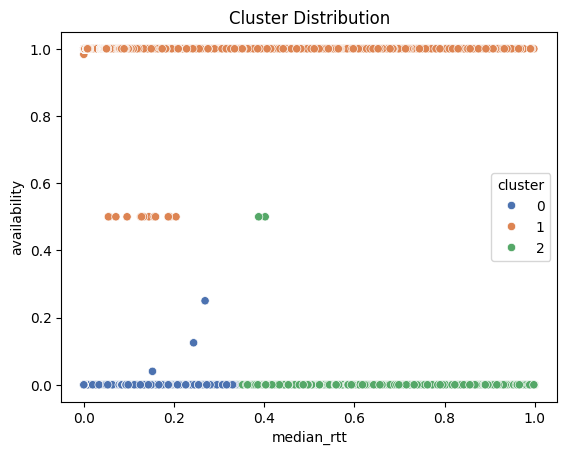

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x="median_rtt", y="availability", hue="cluster", palette="deep")
plt.title("Cluster Distribution")
plt.show()


#### 📌 Final Summary of Cluster Insights
### Cluster	Behavior	Availability	RTT	Volatility	Insights
### Cluster 0 (3.74M IPs)	Mostly unreachable, unstable	Very Low (~0.0000001)	Near 0 ms	High (~1.0)	Likely firewalled, dead, or filtered networks
### Cluster 1 (1.13M IPs)	Highly active & responsive	High (~0.999)	~50 ms	High (~1.0)	Stable networks, possibly servers or active hosts
### Cluster 2 (10K IPs)	High RTT & Congestion Issues	Low (~0.0001)	~670 ms	High (~1.0)	Slow networks, possibly misconfigured or far-away nodes


In [19]:
import pandas as pd
import numpy as np
import glob
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Step 1: Combine all files ending with "_derived.csv"
file_pattern = "*_derived.csv"
file_list = glob.glob(file_pattern)

print(f"Found {len(file_list)} files to merge.")

# Read and concatenate all derived files
df_list = []
for file in file_list:
    print(f"Reading {file}...")
    df_list.append(pd.read_csv(file))

# Merge all files into a single DataFrame
df = pd.concat(df_list, ignore_index=True)
print(f"Merged dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# Step 2: Handle missing values (Replace NaNs)
df.fillna({
    "availability": 0, 
    "volatility": 0, 
    "median_up": 0, 
    "median_rtt": df["median_rtt"].median(), 
    "std_rtt": df["std_rtt"].median()
}, inplace=True)
print("Missing values handled.")

# Step 3: Normalize numerical features
scaler = MinMaxScaler()
df[["availability", "volatility", "median_up", "median_rtt", "std_rtt"]] = scaler.fit_transform(
    df[["availability", "volatility", "median_up", "median_rtt", "std_rtt"]]
)
print("Features normalized.")

# Step 4: Apply K-Means clustering
n_clusters = 3  # Adjust if needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(df[["availability", "volatility", "median_up", "median_rtt", "std_rtt"]])
print("K-Means clustering completed.")

# Step 5: Save clustered data
output_file = "output_combined_kmeans_clustered.csv"
df.to_csv(output_file, index=False)
print(f"Clustering results saved to {output_file}.")

# Step 6: Display cluster counts
print("Cluster distribution:")
print(df["cluster"].value_counts())

# Provide the file path for download
output_file


Found 13 files to merge.
Reading output_part_ac_derived.csv...
Reading output_part_aj_derived.csv...
Reading output_part_af_derived.csv...
Reading output_part_ae_derived.csv...
Reading output_part_al_derived.csv...
Reading output_part_ai_derived.csv...
Reading output_part_ag_derived.csv...
Reading output_part_ak_derived.csv...
Reading output_part_ab_derived.csv...
Reading output_part_aa_derived.csv...
Reading output_part_ah_derived.csv...
Reading output_part_am_derived.csv...
Reading output_part_ad_derived.csv...
Merged dataset has 62632495 rows and 6 columns.
Missing values handled.
Features normalized.



KeyboardInterrupt



In [20]:
# Count occurrences of each probe address in the merged dataset
ip_counts = df["probe_addr"].value_counts()

# Display the top 50 repeated IP addresses with their count
top_50_ips = ip_counts.head(50)
print(top_50_ips)


probe_addr
 63.151.172.214    13
       --------    13
  43.247.251.78    13
   192.168.0.18    13
   192.168.0.17    13
   192.168.0.14    13
   192.168.0.13    13
   192.168.0.11    13
   192.168.0.19    12
 212.188.134.22    10
  185.59.160.20    10
  220.89.46.142     9
  220.89.46.211     9
   192.168.0.15     9
    220.89.46.1     8
    220.89.46.5     8
  220.89.46.207     8
   220.89.46.38     8
  168.87.68.169     8
   220.89.46.91     8
   220.89.46.40     8
 207.223.70.126     8
 86.109.252.122     8
   220.89.46.26     8
    220.89.46.3     8
   220.89.46.97     8
      192.0.0.2     8
  168.87.68.175     8
  168.87.68.177     8
   220.89.46.99     8
  168.87.68.183     8
  168.87.68.184     8
  168.87.68.185     8
   220.89.46.24     8
 203.101.232.32     8
 86.109.252.117     8
  220.89.46.215     8
   220.89.46.81     8
203.101.232.127     8
  220.89.46.238     8
   220.89.46.13     8
203.101.232.234     8
203.101.232.236     8
   220.89.46.31     8
  220.89.46.248     8

In [21]:
# Create a new DataFrame with only rows corresponding to the top 50 repeated IPs
top_50_ip_rows = df[df["probe_addr"].isin(top_50_ips.index)]

# Define output file path
output_top_50_file = "top_50_ip_rows.csv"
 
# Save the filtered data
top_50_ip_rows.to_csv(output_top_50_file, index=False)

print(f"Saved rows associated with the top 50 repeated IPs to {output_top_50_file}.")


Saved rows associated with the top 50 repeated IPs to top_50_ip_rows.csv.


In [22]:
sorted_file = "merged_sorted.csv"
output_file = "merged_derived_features.csv"

df = df.sort_values(by="probe_addr")
df.to_csv(sorted_file, index=False)
print(f"Sorted file saved: {sorted_file}")



Sorted file saved: merged_sorted.csv


In [24]:
df.head() 

,probe_addr,availability,volatility,median_up,median_rtt,std_rtt
0,5.3.0.0,0.0,1.0,0.0,0.0,0.066362
44021504,5.3.0.0,0.0,1.0,0.0,0.0,0.066362
9782764,5.3.0.0,0.0,1.0,0.0,0.0,0.066362
48913146,5.3.0.0,0.0,1.0,0.0,0.0,0.066362
4889792,5.3.0.0,0.0,1.0,0.0,0.0,0.066362


In [25]:
# Perform groupby aggregation
df_aggregated = df.groupby("probe_addr").agg({
    "availability": "mean",   # Average availability
    "volatility": "mean",     # Average volatility
    "median_up": "median",    # Median of continuous up durations
    "median_rtt": "median",   # Median RTT
    "std_rtt": "mean"         # Average standard deviation of RTT
}).reset_index()

# Save to CSV
df_aggregated.to_csv(output_file, index=False)
print(f"Aggregated derived features saved to {output_file}.")

Aggregated derived features saved to merged_derived_features.csv.


In [26]:
print(f"Merged dataset has {df_aggregated.shape[0]} rows and {df_aggregated.shape[1]} columns.")


Merged dataset has 10444624 rows and 6 columns.


In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


# Normalize numerical features
scaler = MinMaxScaler()
df_aggregated[["availability", "volatility", "median_up", "median_rtt", "std_rtt"]] = scaler.fit_transform(
    df_aggregated[["availability", "volatility", "median_up", "median_rtt", "std_rtt"]]
)

# Apply K-Means clustering (without batching)
n_clusters = 3  # Adjust based on data distribution
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df_aggregated["cluster"] = kmeans.fit_predict(df_aggregated[["availability", "volatility", "median_up", "median_rtt", "std_rtt"]])

# Save clustered data
output_file = "output1_kmeans_clustered.csv"
df_aggregated.to_csv(output_file, index=False)

# Display cluster counts
print(df_aggregated["cluster"].value_counts())

# Provide the file path for download
output_file


cluster
0    7942575
1    2407185
2      94864
Name: count, dtype: int64


'output1_kmeans_clustered.csv'

In [29]:
df_aggregated[df_aggregated["cluster"] == 0].describe()


,availability,volatility,median_up,median_rtt,std_rtt,cluster
count,7.942575e+06,7.942575e+06,7942575.0,7.942575e+06,7.942575e+06,7942575.0
mean,4.640596e-04,9.999867e-01,0.0,7.214322e-04,7.183713e-02,0.0
std,1.100271e-02,2.164440e-03,0.0,5.993309e-03,7.776101e-03,0.0
min,0.000000e+00,9.591967e-03,0.0,0.000000e+00,0.000000e+00,0.0
25%,0.000000e+00,1.000000e+00,0.0,0.000000e+00,7.227390e-02,0.0
50%,0.000000e+00,1.000000e+00,0.0,0.000000e+00,7.227390e-02,0.0
75%,0.000000e+00,1.000000e+00,0.0,0.000000e+00,7.227390e-02,0.0
max,4.285714e-01,1.000000e+00,0.0,1.582416e-01,2.062776e-01,0.0


In [30]:
df_aggregated[df_aggregated["cluster"] == 1].describe()


,availability,volatility,median_up,median_rtt,std_rtt,cluster
count,2.407185e+06,2.407185e+06,2407185.0,2.407185e+06,2.407185e+06,2407185.0
mean,9.960592e-01,9.998688e-01,0.0,4.545763e-02,7.226236e-02,1.0
std,3.468737e-02,8.021535e-03,0.0,2.692400e-02,1.500194e-03,0.0
min,5.000000e-01,0.000000e+00,0.0,0.000000e+00,1.903179e-06,1.0
25%,1.000000e+00,1.000000e+00,0.0,2.159601e-02,7.227390e-02,1.0
50%,1.000000e+00,1.000000e+00,0.0,4.840667e-02,7.227390e-02,1.0
75%,1.000000e+00,1.000000e+00,0.0,5.693289e-02,7.227390e-02,1.0
max,1.000000e+00,1.000000e+00,0.0,9.240947e-01,1.000000e+00,1.0


In [31]:
df_aggregated[df_aggregated["cluster"] == 2].describe()


,availability,volatility,median_up,median_rtt,std_rtt,cluster
count,94864.000000,94864.000000,94864.0,94864.000000,94864.000000,94864.0
mean,0.000847,0.999788,0.0,0.169674,0.206294,2.0
std,0.018086,0.009084,0.0,0.143277,0.067842,0.0
min,0.000000,0.277209,0.0,0.033020,0.009527,2.0
25%,0.000000,1.000000,0.0,0.099864,0.165730,2.0
50%,0.000000,1.000000,0.0,0.129168,0.208815,2.0
75%,0.000000,1.000000,0.0,0.154450,0.255670,2.0
max,0.583333,1.000000,0.0,1.000000,0.708633,2.0


1. Cluster 0
Count: ~7.94 million addresses
Mean availability: 0.000464 (~0.046% “up” time)
Mean volatility: ~0.9999 (very close to 1.0)
Mean median_rtt: 7.21e-4 (0.00072 seconds → ~0.7 ms)
Mean std_rtt: ~0.0718
Interpretation
Very low availability (almost always down).
High volatility near 1 suggests that whenever they respond at all, it may be just a single probe or very brief.
Tiny median_rtt is somewhat suspicious—possibly those rare replies are from a very nearby router, or it could be an artifact (e.g., a placeholder or rounding).
Essentially, Cluster 0 looks like “mostly unresponsive addresses” that rarely respond and (when they do) appear to have a small measured RTT. They could be unassigned addresses, firewalled, or ephemeral IPs that answered exactly once.

2. Cluster 1
Count: ~2.41 million addresses
Mean availability: ~0.996 (99.6% up)
Mean volatility: ~0.9999
Mean median_rtt: ~0.045 (45 ms)
Mean std_rtt: ~0.072
Interpretation
Very high availability (near 100%).
Volatility near 1.0 is a bit contradictory if they are always up. It may reflect how volatility is computed (perhaps it’s normalized or capturing even minor changes).
Median RTT of ~45 ms is typical for a stable, globally reachable address with moderate distance from your prober.
Cluster 1 suggests “almost always up” addresses—servers, infrastructure IPs, or stable broadband connections that respond reliably.

3. Cluster 2
Count: 94,864 addresses (much smaller group)
Mean availability: ~0.000847 (~0.085% up)
Mean volatility: ~0.9997
Mean median_rtt: ~0.17 (170 ms)
Mean std_rtt: ~0.206
Interpretation
Extremely low availability (similar to Cluster 0, but slightly higher).
High volatility again suggests ephemeral or brief responsiveness.
Higher RTT (~170 ms) and a larger standard deviation (~0.21) imply longer latency and more variable network paths. This could be satellite links, mobile networks, or farther global addresses that are rarely up.
Cluster 2 likely represents “rarely online, but when they are, the latency is quite high”. Possibly addresses in remote regions, or special-purpose networks that respond intermittently.

4. Overall Observations
All clusters show near-1.0 volatility.

This could indicate your volatility definition is sensitive to even a single missed probe or single up-probe, causing a “state change.”
Double-check your volatility formula to ensure it aligns with your intended concept of “how often up/down toggles.”
Median Up = 0 in all clusters.

This suggests the measured “continuous uptime” might be extremely short (or missing) for almost every IP.
Possibly your sampling or a data artifact means no IP was continuously “up” across multiple consecutive intervals, so the median session length is 0.
Alternatively, you might need to refine how median_up is calculated.
Interpretation:

Cluster 0: “Mostly never up” but short-latency when it does respond.
Cluster 1: “Almost always up,” stable addresses with moderate RTT (~45 ms).
Cluster 2: “Rarely up” with high RTT (~170 ms) and more jitter (~0.21).
5. Next Steps
Investigate Volatility: If you expect stable 

In [ ]:
ip addresses have reverse host names, it might have nat or dhcp or home might give clues to find the label, public host names where we can have reverse host names, how to identify names? there is a paper mathew lucky at imc2019 learning regex to extract router host names, classification is agreat plan C, another direction get another dataset end of 2024 and compare results, be clear on your report on data analysed, most nats come and go, i will analyse 2 weeks, 